# **Results**

### Basic setup:

In [199]:
# magics
%load_ext autoreload
%reload_ext autoreload

%autoreload 2

# load general packages
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# load modules
from model_vfi import model_bufferstock

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [200]:
model = model_bufferstock()

In [201]:
sol = model.sol
par = model.par
aux = model.aux



In [260]:
model.setup()

par.T = 5
par.N = 10              # Number of points in grids
par.w_old_max = 3.0     # Maximum cash on hand
par.d_old_max = 0.74    # Maximum total debt
par.rho = 3


model.allocate()
model.create_grids()

model.solve()

T ===========  4
T ===========  3
T ===========  2
T ===========  1
T ===========  0


No handles with labels found to put in legend.


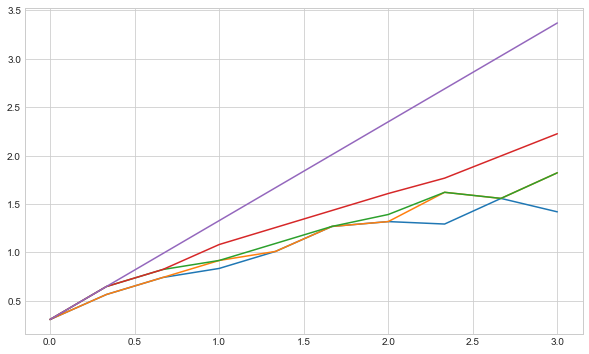

In [261]:
fig = plt.figure(figsize=(10,6))

ax = fig.add_subplot(1,1,1)

for t in range(par.T):
    plt.plot(sol.grid_w_old[t,:], sol.c[t,5,:,0])

plt.legend()
plt.show()

No handles with labels found to put in legend.


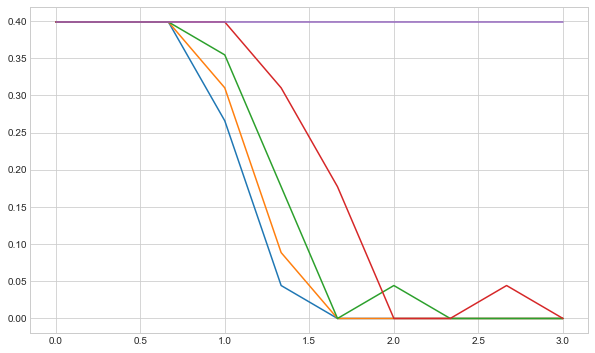

In [262]:
fig = plt.figure(figsize=(10,6))

ax = fig.add_subplot(1,1,1)

for t in range(par.T):
    plt.plot(sol.grid_w_old[t,:], sol.d[t,5,:,1])

plt.legend()
plt.show()

No handles with labels found to put in legend.


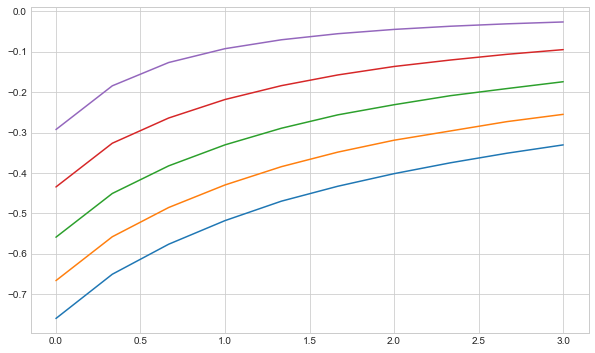

In [263]:
fig = plt.figure(figsize=(10,6))

ax = fig.add_subplot(1,1,1)

for t in range(par.T):
    plt.plot(sol.grid_w_old[t,:], sol.v[t,5,:,0])

plt.legend()
plt.show()

In [264]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact

netto_assets = False

unemployment = 0

fig = plt.figure(figsize=(10, 6))

sol.grid_n = np.zeros((par.T, par.N))


def update_plot(t):
    # Create a figure and a 3D subplot

    sol.grid_n[t,:] = np.zeros(par.N)
    sol.grid_n[t,:] = sol.grid_w_old[t,:] - 0.74

    if netto_assets == True:
        x_axis = sol.grid_n[t,:]
        x_label_name = "n"

    else:
        x_axis = sol.grid_w_old[t,:]
        x_label_name = "w_old"
     


    fig = plt.figure(figsize=(20, 7))
    ax1 = fig.add_subplot(131, projection='3d')

    # Create grid coordinates from x and y
    w_old, d_old = np.meshgrid(x_axis, sol.grid_d_old[t, :])

    # Plot the surface
    ax1.plot_surface(w_old, d_old, sol.c[t, :, :, unemployment], cmap='viridis')

    # Invert the x-axis
    ax1.set_xlim(ax1.get_xlim()[::-1])
    ax1.set_ylim(ax1.get_ylim()[::-1])

    # Set labels and title
    ax1.set_xlabel(x_label_name)
    ax1.set_ylabel('d_old')
    ax1.set_zlabel('c')
    ax1.set_title('Consumption')



    ax2 = fig.add_subplot(132, projection='3d')

    w_old, d_old = np.meshgrid(x_axis, sol.grid_d_old[t, :])

    ax2.plot_surface(w_old, d_old, sol.v[t, :, :, unemployment], cmap='viridis')

    ax2.set_xlim(ax2.get_xlim()[::-1])
    ax2.set_ylim(ax2.get_ylim()[::-1])

    ax2.set_xlabel(x_label_name)
    ax2.set_ylabel('d_old')
    ax2.set_zlabel('v')
    ax2.set_title('Utility')



    ax3 = fig.add_subplot(133, projection='3d')

    w_old, d_old = np.meshgrid(sol.grid_w_old[t,:], sol.grid_d_old[t, :])

    ax3.plot_surface(w_old, d_old, sol.d[t, :, :, unemployment], cmap='viridis')

    # ax3.set_xlim(ax3.get_xlim()[::-1])
    # ax3.set_ylim(ax3.get_ylim()[::-1])

    ax3.set_xlabel(x_label_name)
    ax3.set_ylabel('d_old')
    ax3.set_zlabel('d')
    ax3.set_title('Debt')

    plt.subplots_adjust(wspace=0.2)


    plt.show()

# Create the interactive slider
interact(update_plot, t=(0, par.T-1, 1))

<Figure size 720x432 with 0 Axes>

interactive(children=(IntSlider(value=2, description='t', max=4), Output()), _dom_classes=('widget-interact',)…

<function __main__.update_plot(t)>

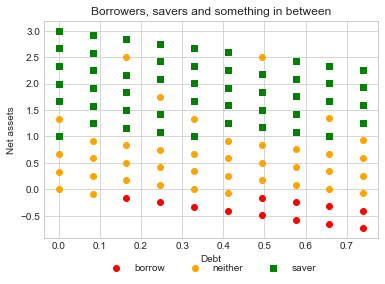

In [265]:
import pandas as pd
import matplotlib.pyplot as plt

t = 0

# Your data here
x = sol.grid_d_old[t,:]
y = sol.grid_w_old[t,:]
z = sol.d[t,:,:, unemployment]

z.flatten()

x_new = []
y_new = []
z_new = []

for i in range(len(x)):
    for j in range(len(y)):
        x_new.append(x[i])
        y_new.append(y[j])
        if z[i,j] > 0.73:
            z_new.append("borrow")
        elif  0.01 < z[i,j] < 0.73:
            z_new.append("neither")
        else:
            z_new.append("saver")

df = pd.DataFrame({
    'x': x_new,
    'y': y_new,
    'category': z_new
})

df['net_assets'] = df['y'] - df['x']


# Define colors and markers for each category
colors = {'borrow': 'red', 'neither': 'orange', 'saver': 'green'}
markers = {'borrow': 'o', 'neither': 'o', 'saver': 's'}

# Plot scatter plot with grouped legend
for category, group in df.groupby('category'):
    plt.scatter(group['x'], group['net_assets'], color=colors[category], marker=markers[category], label=category)

# Add legend
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=3)

# Add labels and title
plt.xlabel('Debt')
plt.ylabel('Net assets')
plt.title('Borrowers, savers and something in between')

# Show the plot
plt.show()



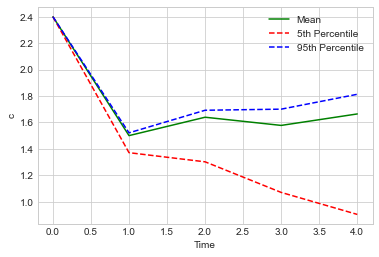

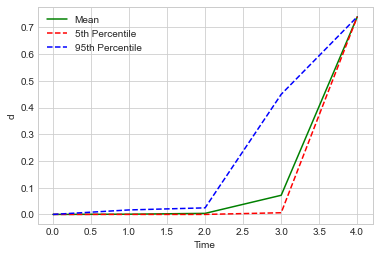

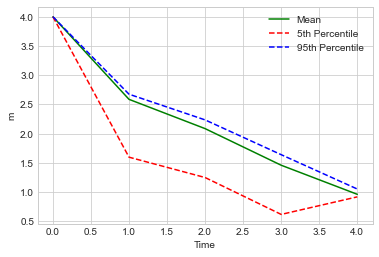

In [266]:
import tools
from numpy import random

class sim: pass

np.random.seed()

par.simN = 100000
par.w_ini = 4
par.d_ini = 0

shape = (par.T, par.simN)

sim.d = np.nan +np.zeros(shape)
sim.c = np.nan +np.zeros(shape)

sim.m = par.w_ini + np.zeros(shape)
sim.w = par.w_ini + np.zeros(shape)
sim.d_old = par.d_ini + np.zeros(shape)

par.Nshocks = par.w.size
shocki = np.random.choice(par.Nshocks,(shape),replace=True,p=par.w) #draw values between 0 and Nshocks-1, with probability w
sim.psi = par.psi_vec[shocki] #Draw shocks from quadrature points
sim.xi = par.xi_vec[shocki] #Draw shocks from quadrature points

u_prob = 5

for t in range(par.T):

    credit_con = random.randint(100)

    if credit_con <= u_prob:
        sim.c[t,:] = tools.interp_2d_vec(sol.grid_d_old[t,:], sol.grid_w_old[t,:], sol.c[t,:,:, 1], sim.d_old[t,:], sim.m[t,:])
        sim.d[t,:] = np.clip(tools.interp_2d_vec(sol.grid_d_old[t,:], sol.grid_w_old[t,:], sol.d[t,:,:, 1], sim.d_old[t,:], sim.m[t,:]), a_min = 0, a_max=0.74)

        if t < par.T-1:
            sim.d_old[t+1,:] = np.minimum((1-par.lambdaa)*sim.d_old[t,:], sim.d[t,:])

            sim.w[t] = sim.m[t,:] + sim.d[t,:] - (1-par.lambdaa)*sim.d_old[t,:] - sim.c[t,:]
            
            sim.m[t+1,:] = (1-par.r_w)*sim.w[t] + par.Gamma*sim.psi[t]*sim.xi[t] - (par.r_d + par.lambdaa)*sim.d[t,:]

    if credit_con > 1 - u_prob:
        sim.c[t,:] = tools.interp_2d_vec(sol.grid_d_old[t,:], sol.grid_w_old[t,:], sol.c[t,:,:, 0], sim.d_old[t,:], sim.m[t,:])
        sim.d[t,:] = np.clip(tools.interp_2d_vec(sol.grid_d_old[t,:], sol.grid_w_old[t,:], sol.d[t,:,:,0], sim.d_old[t,:], sim.m[t,:]), a_min = 0, a_max=0.74)

        if t < par.T-1:
            sim.d_old[t+1,:] = np.clip(sim.d[t,:], a_min = 0, a_max = 0.74) 

            sim.w[t] = sim.m[t,:] + sim.d[t,:] - (1-par.lambdaa)*sim.d_old[t,:] - sim.c[t,:]

            sim.m[t+1,:] = (1-par.r_w)*sim.w[t] + par.Gamma*sim.psi[t]*sim.xi[t] - (par.r_d + par.lambdaa)*sim.d[t,:] 


def mean_graph(data, y_value):
    mean = np.mean(data, axis=1)
    p5 = np.percentile(data, 5, axis=1)
    p95 = np.percentile(data, 95, axis=1)

    plt.plot(mean, color='g', label='Mean')
    plt.plot(p5, color='r', linestyle='--', label='5th Percentile')
    plt.plot(p95, color='b', linestyle='--', label='95th Percentile')

    plt.xlabel('Time')
    plt.ylabel(y_value)
    plt.legend()
    plt.show()

mean_graph(sim.c, "c")

mean_graph(sim.d, "d")

mean_graph(sim.m, "m")

In [267]:
puzzle_share[t] += np.sum((sim.d[t,:] < 0.73) & (sim.d[t,:] > 0.01)) / len(sim.d[t,:])
puzzle_share

array([0.     , 0.17118, 0.90974, 0.     , 0.     ])

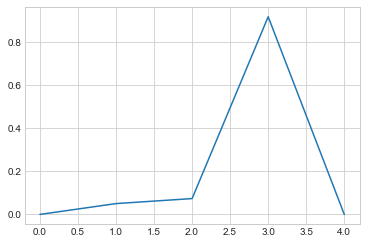

In [268]:
puzzle_share = np.zeros((par.T))

for t in range(par.T):
    puzzle_share[t] += np.sum((sim.d[t,:] < 0.73) & (sim.d[t,:] > 0.01)) / len(sim.d[t,:])


plt.plot(puzzle_share)

In [269]:
t = 2

np.sum((sim.d[t,:] < 0.73) & (sim.d[t,:] > 0.01)) / len(sim.d[t,:])

0.07361